# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
# Watch for changes in any of the imported files
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
from collections import deque
from unityagents import UnityEnvironment

import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name='./Tennis_Linux/Tennis.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each timestep.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next timestep
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.09000000171363354
Score (max over agents) from episode 4: 0.10000000149011612
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
def plot_scores(scores):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

In [6]:
# Note: `brain_name` should be defined globally
def env_step(env, actions):
    # Execute the action for each agent in the environment
    env_info = env.step(actions)[brain_name]
    # Get the next state for each agent
    next_states = env_info.vector_observations
    # Get the reward for each agent
    rewards = env_info.rewards
    # Get whether or not the episode has terminated
    dones = env_info.local_done
    return next_states, rewards, dones

In [7]:
def train_ddpg(agent, n_episodes=5000, save_file=None):
    """Deep Deterministic Policy Gradients.
    
    Params
    ======
        agent (Agent): an instance of a DDPG agent(s)
        n_episodes (int): maximum number of training episodes
        save_file (string): prefix for the actor and critic model filenames
    """
    
    # All the scores from each episode
    scores_all = []
    # The last 100 scores
    scores_window = deque(maxlen=100)
    
    # Loop over each episode
    for i_episode in range(1, n_episodes+1):
        # Reset the environment
        env_info = env.reset(train_mode=True)[brain_name]
        # Get the current state for each agent
        states = env_info.vector_observations
        # Reset the noise
        agent.reset()
        # Initialize the score for each agent
        scores = np.zeros(num_agents)
        # Keep track of the current timestep
        t = 0
        
        # Loop over each timestep until done
        while True:            
            # Select an action for each agent according to the current policy
            actions = agent.act(states)
            # Execute the actions in the environment,
            #     then observe the next state and reward for each agent
            next_states, rewards, dones = env_step(env, actions)
            # Learn from experience and update network parameters for each agent
            agent.step(states, actions, rewards, next_states, dones)
            
            # Update the score for each agent
            scores += rewards
            # Roll over each state to the next timestep
            states = next_states
            # Record the current mean score across all agents, (overwriting the output)
            print(f'\rEpisode {i_episode}\tTimestep {t}'
                  f'\tCurrent Score: {np.mean(scores):.5f}', end="")
            t += 1
            # Exit the loop if the episode has terminated
            if np.any(dones):
                break
        
        # For this episode, add up the rewards that each agent received
        scores_sum = []
        for i_agent in range(num_agents):
            scores_sum.append(np.sum(scores[i_agent]))
        # For this episode, take the max over the two agent (summed) scores
        score = np.max(scores_sum)
        # Save the most recent score
        scores_all.append(score)
        scores_window.append(score)
        # Record the mean score over the last 100 scores
        mean_score = np.mean(scores_window)
                
        # Every 20 episodes, record the mean score over the last 100 (or less) episodes
        if i_episode % 20 == 0:
            print(f'\rEpisode {i_episode}'
                  f'\tAverage score over the last 100 episodes: {mean_score:.5f}')
            
        # Goal: Reach 0.5+ over 100 consecutive episodes
        if mean_score >= 0.5:
            print(f'\nEnvironment solved in {i_episode:d} episodes!'
                  f'\tAverage score over the last 100 episodes: {mean_score:.5f}')
            if save_file:
                torch.save(agent.actor_local.state_dict(), f'{save_file}_actor.pth')
                torch.save(agent.critic_local.state_dict(), f'{save_file}_critic.pth')
            break
            
    return scores_all

#### Initial Run

Episode 1	Average score over the last 100 episodes: 0.10000
Episode 2	Average score over the last 100 episodes: 0.05000
Episode 3	Average score over the last 100 episodes: 0.06667
Episode 4	Average score over the last 100 episodes: 0.05000
Episode 5	Average score over the last 100 episodes: 0.04000
Episode 6	Average score over the last 100 episodes: 0.03333
Episode 7	Average score over the last 100 episodes: 0.02857
Episode 8	Average score over the last 100 episodes: 0.02500
Episode 9	Average score over the last 100 episodes: 0.02222
Episode 10	Average score over the last 100 episodes: 0.02000
Episode 11	Average score over the last 100 episodes: 0.01818
Episode 12	Average score over the last 100 episodes: 0.01667
Episode 13	Average score over the last 100 episodes: 0.01538
Episode 14	Average score over the last 100 episodes: 0.01429
Episode 15	Average score over the last 100 episodes: 0.01333
Episode 16	Average score over the last 100 episodes: 0.01250
Episode 17	Average score over the

Episode 135	Average score over the last 100 episodes: 0.00000
Episode 136	Average score over the last 100 episodes: 0.00000
Episode 137	Average score over the last 100 episodes: 0.00000
Episode 138	Average score over the last 100 episodes: 0.00000
Episode 139	Average score over the last 100 episodes: 0.00000
Episode 140	Average score over the last 100 episodes: 0.00000
Episode 141	Average score over the last 100 episodes: 0.00000
Episode 142	Average score over the last 100 episodes: 0.00000
Episode 143	Average score over the last 100 episodes: 0.00000
Episode 144	Average score over the last 100 episodes: 0.00000
Episode 145	Average score over the last 100 episodes: 0.00000
Episode 146	Average score over the last 100 episodes: 0.00000
Episode 147	Average score over the last 100 episodes: 0.00000
Episode 148	Average score over the last 100 episodes: 0.00000
Episode 149	Average score over the last 100 episodes: 0.00000
Episode 150	Average score over the last 100 episodes: 0.00000
Episode 

Episode 268	Average score over the last 100 episodes: 0.02360
Episode 269	Average score over the last 100 episodes: 0.02360
Episode 270	Average score over the last 100 episodes: 0.02460
Episode 271	Average score over the last 100 episodes: 0.02460
Episode 272	Average score over the last 100 episodes: 0.02460
Episode 273	Average score over the last 100 episodes: 0.02460
Episode 274	Average score over the last 100 episodes: 0.02560
Episode 275	Average score over the last 100 episodes: 0.02660
Episode 276	Average score over the last 100 episodes: 0.02760
Episode 277	Average score over the last 100 episodes: 0.02860
Episode 278	Average score over the last 100 episodes: 0.02860
Episode 279	Average score over the last 100 episodes: 0.02860
Episode 280	Average score over the last 100 episodes: 0.02860
Episode 281	Average score over the last 100 episodes: 0.02860
Episode 282	Average score over the last 100 episodes: 0.02860
Episode 283	Average score over the last 100 episodes: 0.02860
Episode 

Episode 400	Average score over the last 100 episodes: 0.05710
Episode 401	Average score over the last 100 episodes: 0.05810
Episode 402	Average score over the last 100 episodes: 0.05710
Episode 403	Average score over the last 100 episodes: 0.05610
Episode 404	Average score over the last 100 episodes: 0.05710
Episode 405	Average score over the last 100 episodes: 0.05800
Episode 406	Average score over the last 100 episodes: 0.05800
Episode 407	Average score over the last 100 episodes: 0.05700
Episode 408	Average score over the last 100 episodes: 0.05710
Episode 409	Average score over the last 100 episodes: 0.05710
Episode 410	Average score over the last 100 episodes: 0.05810
Episode 411	Average score over the last 100 episodes: 0.05810
Episode 412	Average score over the last 100 episodes: 0.05910
Episode 413	Average score over the last 100 episodes: 0.06010
Episode 414	Average score over the last 100 episodes: 0.06210
Episode 415	Average score over the last 100 episodes: 0.06210
Episode 

Episode 532	Average score over the last 100 episodes: 0.16940
Episode 533	Average score over the last 100 episodes: 0.17040
Episode 534	Average score over the last 100 episodes: 0.17240
Episode 535	Average score over the last 100 episodes: 0.17150
Episode 536	Average score over the last 100 episodes: 0.17650
Episode 537	Average score over the last 100 episodes: 0.17550
Episode 538	Average score over the last 100 episodes: 0.17550
Episode 539	Average score over the last 100 episodes: 0.18150
Episode 540	Average score over the last 100 episodes: 0.18060
Episode 541	Average score over the last 100 episodes: 0.18160
Episode 542	Average score over the last 100 episodes: 0.18060
Episode 543	Average score over the last 100 episodes: 0.18360
Episode 544	Average score over the last 100 episodes: 0.18360
Episode 545	Average score over the last 100 episodes: 0.18660
Episode 546	Average score over the last 100 episodes: 0.18860
Episode 547	Average score over the last 100 episodes: 0.18870
Episode 

Episode 664	Average score over the last 100 episodes: 0.21260
Episode 665	Average score over the last 100 episodes: 0.21260
Episode 666	Average score over the last 100 episodes: 0.20760
Episode 667	Average score over the last 100 episodes: 0.20650
Episode 668	Average score over the last 100 episodes: 0.20550
Episode 669	Average score over the last 100 episodes: 0.20350
Episode 670	Average score over the last 100 episodes: 0.19850
Episode 671	Average score over the last 100 episodes: 0.20060
Episode 672	Average score over the last 100 episodes: 0.20060
Episode 673	Average score over the last 100 episodes: 0.19660
Episode 674	Average score over the last 100 episodes: 0.19960
Episode 675	Average score over the last 100 episodes: 0.20060
Episode 676	Average score over the last 100 episodes: 0.20060
Episode 677	Average score over the last 100 episodes: 0.20160
Episode 678	Average score over the last 100 episodes: 0.20360
Episode 679	Average score over the last 100 episodes: 0.20560
Episode 

Episode 796	Average score over the last 100 episodes: 0.19980
Episode 797	Average score over the last 100 episodes: 0.20880
Episode 798	Average score over the last 100 episodes: 0.21980
Episode 799	Average score over the last 100 episodes: 0.21680
Episode 800	Average score over the last 100 episodes: 0.21580
Episode 801	Average score over the last 100 episodes: 0.21680
Episode 802	Average score over the last 100 episodes: 0.21580
Episode 803	Average score over the last 100 episodes: 0.21470
Episode 804	Average score over the last 100 episodes: 0.21570
Episode 805	Average score over the last 100 episodes: 0.22170
Episode 806	Average score over the last 100 episodes: 0.22970
Episode 807	Average score over the last 100 episodes: 0.23170
Episode 808	Average score over the last 100 episodes: 0.23070
Episode 809	Average score over the last 100 episodes: 0.22970
Episode 810	Average score over the last 100 episodes: 0.23370
Episode 811	Average score over the last 100 episodes: 0.23870
Episode 

Episode 928	Average score over the last 100 episodes: 0.32300
Episode 929	Average score over the last 100 episodes: 0.31800
Episode 930	Average score over the last 100 episodes: 0.31800
Episode 931	Average score over the last 100 episodes: 0.32510
Episode 932	Average score over the last 100 episodes: 0.32610
Episode 933	Average score over the last 100 episodes: 0.31810
Episode 934	Average score over the last 100 episodes: 0.32110
Episode 935	Average score over the last 100 episodes: 0.33010
Episode 936	Average score over the last 100 episodes: 0.33420
Episode 937	Average score over the last 100 episodes: 0.35820
Episode 938	Average score over the last 100 episodes: 0.35920
Episode 939	Average score over the last 100 episodes: 0.35510
Episode 940	Average score over the last 100 episodes: 0.36100
Episode 941	Average score over the last 100 episodes: 0.37100
Episode 942	Average score over the last 100 episodes: 0.37000
Episode 943	Average score over the last 100 episodes: 0.37290
Episode 

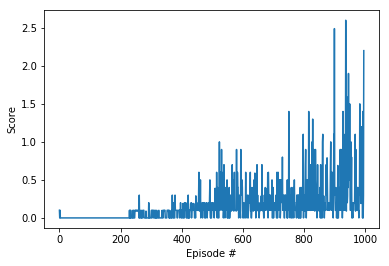

In [8]:
# Instantiate the agent
agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size,
              random_seed=0)

# Train the DDPG agent
scores = train_ddpg(agent, save_file='./checkpoints/initial')

# Plot the scores
plot_scores(scores)

In [9]:
env.close()

#### Trial Runs

In [8]:
# Try with tau of 1e-3
agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size,
              random_seed=0)
scores = train_ddpg(agent, save_file='./checkpoints/trial_01')
plot_scores(scores)

Episode 20	Average score over the last 100 episodes: 0.01000
Episode 40	Average score over the last 100 episodes: 0.00500
Episode 60	Average score over the last 100 episodes: 0.00333
Episode 80	Average score over the last 100 episodes: 0.00250
Episode 100	Average score over the last 100 episodes: 0.00200
Episode 120	Average score over the last 100 episodes: 0.00000
Episode 140	Average score over the last 100 episodes: 0.00000
Episode 160	Average score over the last 100 episodes: 0.00000
Episode 180	Average score over the last 100 episodes: 0.00000
Episode 200	Average score over the last 100 episodes: 0.00000
Episode 220	Average score over the last 100 episodes: 0.00000
Episode 240	Average score over the last 100 episodes: 0.00000
Episode 260	Average score over the last 100 episodes: 0.00000
Episode 280	Average score over the last 100 episodes: 0.00000
Episode 300	Average score over the last 100 episodes: 0.00000
Episode 320	Average score over the last 100 episodes: 0.00000
Episode 340	

Episode 2640	Average score over the last 100 episodes: 0.00000
Episode 2660	Average score over the last 100 episodes: 0.00000
Episode 2680	Average score over the last 100 episodes: 0.00000
Episode 2700	Average score over the last 100 episodes: 0.00000
Episode 2720	Average score over the last 100 episodes: 0.00000
Episode 2740	Average score over the last 100 episodes: 0.00000
Episode 2760	Average score over the last 100 episodes: 0.00000
Episode 2780	Average score over the last 100 episodes: 0.00000
Episode 2800	Average score over the last 100 episodes: 0.00000
Episode 2820	Average score over the last 100 episodes: 0.00000
Episode 2840	Average score over the last 100 episodes: 0.00000
Episode 2860	Average score over the last 100 episodes: 0.00000
Episode 2880	Average score over the last 100 episodes: 0.00000
Episode 2900	Average score over the last 100 episodes: 0.00000
Episode 2920	Average score over the last 100 episodes: 0.00000
Episode 2940	Average score over the last 100 episodes: 

KeyboardInterrupt: 

Episode 20	Average score over the last 100 episodes: 0.01000
Episode 40	Average score over the last 100 episodes: 0.01700
Episode 60	Average score over the last 100 episodes: 0.02283
Episode 80	Average score over the last 100 episodes: 0.01963
Episode 100	Average score over the last 100 episodes: 0.02160
Episode 120	Average score over the last 100 episodes: 0.03750
Episode 140	Average score over the last 100 episodes: 0.06320
Episode 160	Average score over the last 100 episodes: 0.09300
Episode 180	Average score over the last 100 episodes: 0.11480
Episode 200	Average score over the last 100 episodes: 0.13460
Episode 220	Average score over the last 100 episodes: 0.15230
Episode 240	Average score over the last 100 episodes: 0.15550
Episode 260	Average score over the last 100 episodes: 0.15260
Episode 280	Average score over the last 100 episodes: 0.15550
Episode 300	Average score over the last 100 episodes: 0.15570
Episode 320	Average score over the last 100 episodes: 0.14000
Episode 340	

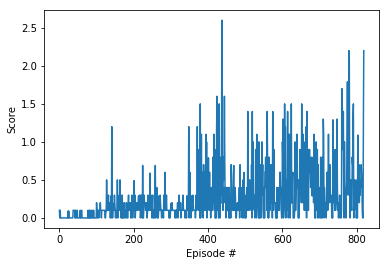

In [8]:
# Try with tau of 1e-1
agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size,
              random_seed=0)
scores = train_ddpg(agent, save_file='./checkpoints/trial_02')
plot_scores(scores)